# Basic Elliptic PDE in 2D 
## Steady State Heat Conduction Problems
Elliptic PDE's are used to model variaty of real worl problems. As an example, we can consider the steady state heat conduction problem. In 2 dimensions, if $u(x,y)$ represents temperature, then the model can be described by Laplace's equation in Cartesian coordinates

\begin{equation}
\nabla^2 u= \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2  u}{\partial y^2}=0, \qquad 0 < x < L, \quad 0 < y < H
\end{equation}

with the boundary conditions 

\begin{align*}
u(x,0)&= 0, & u(x, H)&=0  \\
u(0, y)&= 0, & u(L,y)&=g(y) 
\end{align*}

We can solve this equation by using the method of seperation of variables. Let $u(x,y)=F(x).G(y)$, then the Laplace's equation becomes
\begin{align*}
F_{xx}(x)G(y) + G_{yy}(y)F(x)=0 \\
\frac{F_{xx}(x)}{F(x)} = - \frac{G_{yy}(y)}{G(y)}
\end{align*}

The only way that those can equal to each other is if it is a constant function. If we introduce a constant $\lambda$, two differential equations occur as in the following

\begin{align*}
F_{xx}(x) &= \lambda F(x) \\
-G_{yy}(y) &= \lambda G(y)
\end{align*}

when $\lambda>0$, by using the boundary conditions $u(x,0)=u(x,H)=0$, the solution for $G(y)$ is

\begin{equation}
G(y) = \sin\left(\frac{n \pi}{H}y \right), \quad \textit{where} \quad \lambda=\left( \frac{n \pi}{H} \right)^2 \quad \textit{and} \quad \forall n \in \mathbb{N}^+
\end{equation}

by using the boundary condition $u(0,y)=0$, the solution for $F(x)$ is

\begin{equation}
F(x)= A_n sinh\left(\frac{n \pi}{H} x \right) 
\end{equation}

The solution for $u(x,y)$ is given by

\begin{equation}
u(x,y)=  \sum_{n=1}^{\infty} A_n sinh\left(\frac{n \pi}{H} x \right) \sin\left(\frac{n \pi}{H}y \right)  
\end{equation}

We now force the nonhomogenous boundary condition $u(L,y)=g(y)$, 
\begin{equation}
u(L,y)= g(y) = \sum_{n=1}^{\infty} A_n sinh\left(\frac{n \pi}{H} L \right) \sin\left(\frac{n \pi}{H}y \right)  
\end{equation}

The way figuring out the coefficient $A_n$'s is to use Fourier transformation. We obtain, 

\begin{equation}
\int_{0}^{H} g(y) \sin\left(\frac{m \pi}{H}y \right) \,dy = \int_{0}^{H} \sum_{n=1}^{\infty} A_n sinh\left(\frac{n \pi}{H} L \right) \sin\left(\frac{n \pi}{H}y \right)  \sin\left(\frac{m \pi}{H}y \right)\,dy
\end{equation}

Considering properties of Fourier series, it becomes,

\begin{equation}
\int_{0}^{H} g(y) \sin\left(\frac{m \pi}{H}y \right) \,dy = A_m \frac{H^2}{2} sinh\left(\frac{m \pi}{H} L \right)
\end{equation}

Therefore the Fourier coefficient $A_m$ are found as 

\begin{equation}
A_m = \frac{2}{H^2 sinh\left(\frac{m \pi}{H} L \right)} \int_{0}^{H} g(y) \sin\left(\frac{m \pi}{H}y \right) \,dy
\end{equation}

**Example.** (Square Solid Object)
An Aluminium square thin plate with insulated surface has dimension  8 cm in each side. If the temperature along edge $x=8$ is given by,
\begin{equation}
u(8,y)=100 sin\left( \frac{\pi y}{8}  \right), \quad 0<y<8
\end{equation}
while the other three edges are kept at $0 °C$. Determine the steady state temperature distribution $u$ at any point $(x,y)$.

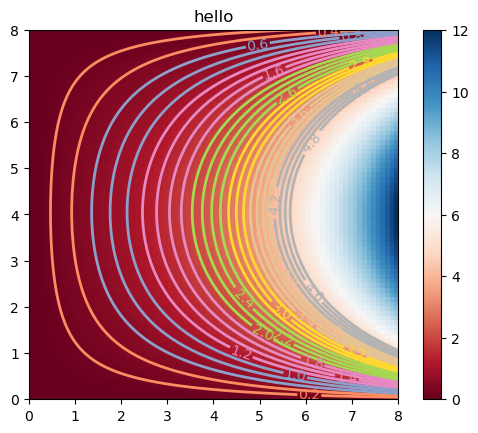

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from mpl_toolkits.mplot3d import axes3d
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import numpy

number=100
H=8
L=8

#initial condition
def g(y):
    return 100 * math.sin((math.pi/8) * y )

#function for finding the coefficient A_n
def A(m):
    B_int = integrate.quad(lambda y: g(y) * math.sin(m * math.pi * y /H ), 0, H)
    return (2 / (H**2 * math.sinh(m * math.pi * L /H ))) * B_int[0]

#total solution u(x,y)
def u(x,y):
    tem_sum=0
    for m in range(1, number):
        ah = ( A(m) * np.sinh(m * math.pi * x /H ) * np.sin(m * math.pi * y /H ) )
        tem_sum = tem_sum + ah
    return tem_sum      
    

x = arange(0, 8, 0.1)
y = arange(0, 8, 0.1)
X,Y = meshgrid(x, y) 
Z = u(X, Y)

im = imshow(np.array(Z),cmap=cm.RdBu, extent=(0, 8, 0, 8)) 
#plt.gca().invert_yaxis()  
cset = contour(Z, arange(-1, 5, 0.2), linewidths=2, cmap=cm.Set2, extent=(0, 8, 0, 8))
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) 
title('hello')
show()


# Restricted Three-Body Problem (R3BP)
The three-body problem describes the motion of three point masses (such as stars, planets or the sun) by taking into account their initial positions and velocities. For most initial conditions, the dynamical system becomes chaotic and is difficult to predict over long periods.


The restricted three-body problem is a special case of this problem where two bodies (called primaries) are much more massive than the 3rd body. Thus we can assume that the 3rd body is negligible and does not affect the motion of the primaries. The problem is then to solve for the motion of the 3rd body, under the gravitational influence of the primaries and can be described as a two-body problem. This assumption is very useful to describe the motion of a spacecraft in the Earth-Moon System. In such a case, the primary bodies are Earth and the Moon, and the 3rd body is spacecraft.
## The Motion of a Spacecraft in the Earth-Moon System
We can model the motion of a spacecraft that has been launched from Earth and passed by the Moon by using the equations of motion for the circular restricted three-body problem (CR3BP) which assumes the orbit of the primaries to be circular.  In the CR3BP, the equations of motion for the 3rd body are expressed in a rotating frame where the primaries are fixed on the x-axis at positions $(-\mu, 0, 0)$ and $(1-\mu, 0, 0)$. Here $µ$ is the mass parameter defines as $\mu=\frac{m_{Moon}}{m_{Earth} + m_{Moon}}$. The third body has position $(x(t), y(t), z(t))$, at time t. Its equations of motion are

\begin{align}
\ddot x - 2\dot y &= \frac{\partial \Omega}{\partial x}  \\
\ddot y + 2\dot x &= \frac{\partial \Omega}{\partial y}  \\
\ddot z &= \frac{\partial \Omega}{\partial z} 
\end{align}

where

\begin{equation}
\Omega(x, y, z)= \frac{1}{2}(x^2 + y^2) + \frac{1-\mu}{r_1} + \frac{\mu}{r_2} 
\end{equation}

with $r_1 ^2 = (x + \mu)^2 + y^2 + z^2$ and $r_2 ^2= (x - 1 + \mu)^2 + y^2 + z^2$ are the distances from the 3rd body to the primaries. The the equations become

\begin{align}
\ddot x - 2\dot y &= x - \frac{(1-\mu)}{r_1 ^3}(x + \mu) - \frac{\mu}{r_2 ^3}(x - 1 + \mu)  \\
\ddot y + 2\dot x &= y- \frac{(1-\mu)}{r_1 ^3}y - \frac{\mu}{r_2 ^3}y \\
\ddot z &= -\frac{(1-\mu)}{r_1 ^3}z - \frac{\mu}{r_2 ^3}z
\end{align}

**Example.**
For the physical parameters $m_{Earth} = 5, 9742 \times 10^{24}$ kg and $m_{Moon} = 7,3477 \times 10^{22}$ kg and initial conditions $x = 0.8$, $y=0$, $z=0$, $\dot x = 0$, $\dot y = 0$ and $\dot z = 0$, solve the equations numerically.

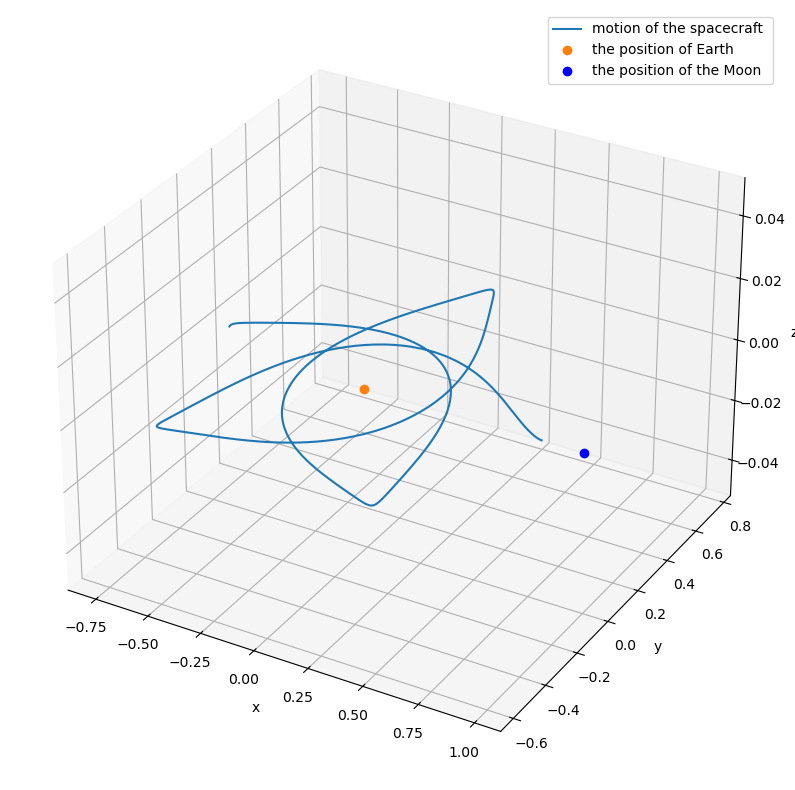

In [2]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

m_earth = 59742 * (10**24)
m_moon = 73477 * (10**22)

mu = m_moon / (m_earth + m_moon)

def spacecraft(parameters, t):
    x, y, z, v_x, v_y, v_z = parameters
    
    r1 = np.sqrt((x+mu)**2 + y**2 + z**2)
    r2 = np.sqrt((x-1+mu)**2 + y**2 + z**2)

    a_x = 2 * v_y + x - (1-mu)*(x+mu)/(r1)**3 - (mu)*(x-1+mu)/(r2)**3
    a_y = -2 * v_x + y - (1-mu)*(y)/(r1)**3 - (mu)*(y)/(r2)**3 
    a_z = -(1-mu)*(z)/(r1)**3 - (mu)*(z)/(r2)**3
    
    return [v_x, v_y, v_z, a_x, a_y, a_z]

# initial conditions 
x_0 = 0.8
y_0 = 0
z_0 = 0
v_x0 = 0
v_y0 = 0
v_z0 = 0
parameters0 = [x_0, y_0, z_0, v_x0, v_y0, v_z0]

t = np.linspace(0, 10, 1000)

# this gives us the values of x,y,z and v_x,v_y,v_z respectively 
result = odeint(spacecraft, parameters0, t)

x = result[:, 0]
y = result[:, 1]
z = result[:, 2]

#position of earth and the moon
Earth_x=[-mu]
Earth_y=[0]
Earth_z=[0]
Moon_x=[1-mu]
Moon_y=[0]
Moon_z=[0]


ax = plt.figure(figsize=(12,10)).add_subplot(projection='3d')
ax.plot(x, y, z, label='motion of the spacecraft ')
ax.plot(Earth_x, Earth_y, Earth_z, "o", label='the position of Earth')
ax.plot(Moon_x, Moon_y, Moon_z, "bo", label='the position of the Moon')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()


